<a href="https://colab.research.google.com/github/vishant750/bike_sharing_demand_prediction/blob/main/Bike_sharing_demad_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  <b> Problem Description </b>
### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


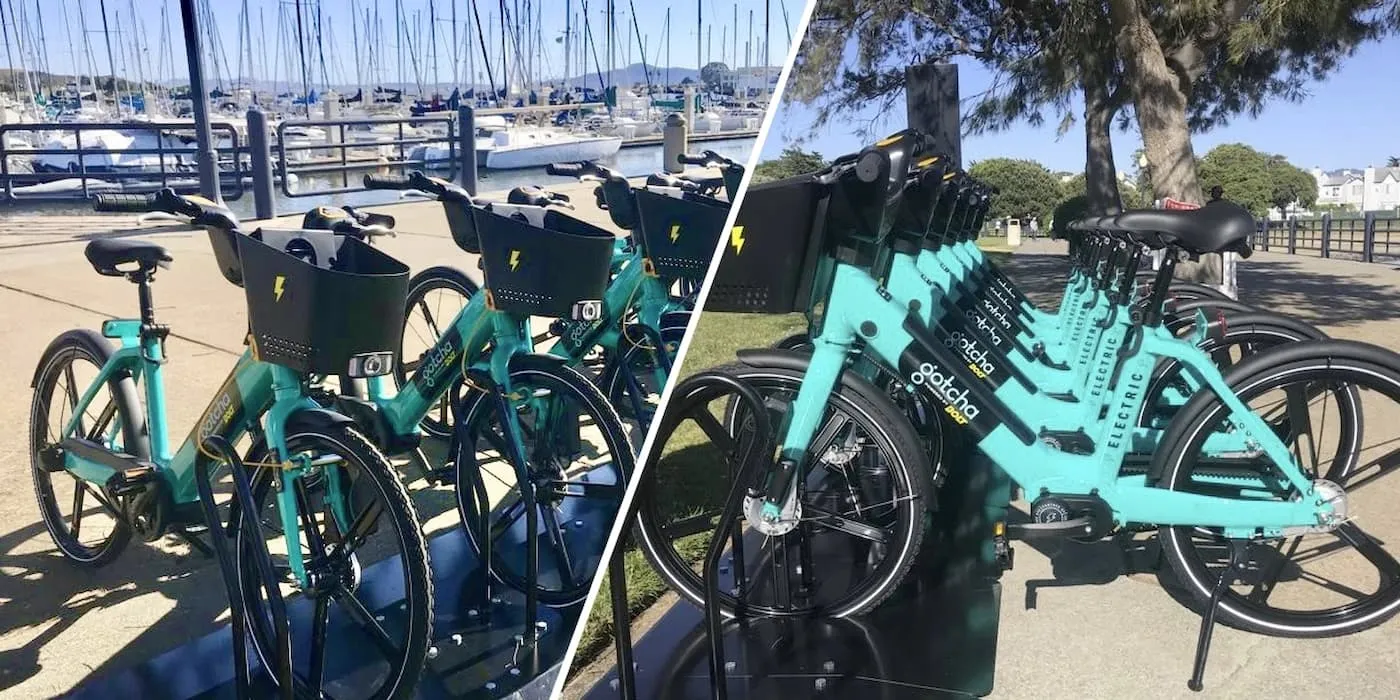





## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Project Flowchart:**



* ### Initial preparations(Loading the dependencies and the data)
* ### List item
* ### EDA
* ### Clean-Up
* ### Feature engineering
* ### Pre processing of the data
* ### Model implementation
* ### Model explainability


# **Initial Pre Processing**

In [127]:
#Importing the Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import skew
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

In [128]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [129]:
#Loading the dataset
#bike_sharing_df=pd.read_csv(r'C:\Users\91706\Downloads\SeoulBikeData (1).csv',encoding='unicode_escape')

In [130]:
#Loading the dataset
bike_sharing_df=pd.read_csv(r'/content/drive/MyDrive/SeoulBikeData (1).csv',encoding='unicode_escape')

# EDA

In [131]:
#First five rows
bike_sharing_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [132]:
#Last five rows
bike_sharing_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [133]:
#columns in dataset
bike_sharing_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [134]:
# Statistical description
bike_sharing_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [135]:
#Summary of the dataset
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [136]:
bike_sharing_df['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [137]:
#Checking for the unique values in the categorical columns
print('Season categorical column can take ',bike_sharing_df.Seasons.unique(),'unique values.')
print('Holiday categorical column can take-',bike_sharing_df.Holiday.unique(),'unique values.')

Season categorical column can take  ['Winter' 'Spring' 'Summer' 'Autumn'] unique values.
Holiday categorical column can take- ['No Holiday' 'Holiday'] unique values.


In [138]:
bike_sharing_df.Seasons.value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [139]:
#Using group by to see analyse 'Season' categorial column effect on 'Rented Bike count'
bike_sharing_season_df=bike_sharing_df.groupby('Seasons')['Rented Bike Count'].sum().reset_index()
bike_sharing_season_df.set_index('Seasons',inplace=True)
bike_sharing_season_df

,Rented Bike Count
Seasons,
Autumn,1790002
Spring,1611909
Summer,2283234
Winter,487169


<Axes: xlabel='Seasons', ylabel='Rented Bike Count'>

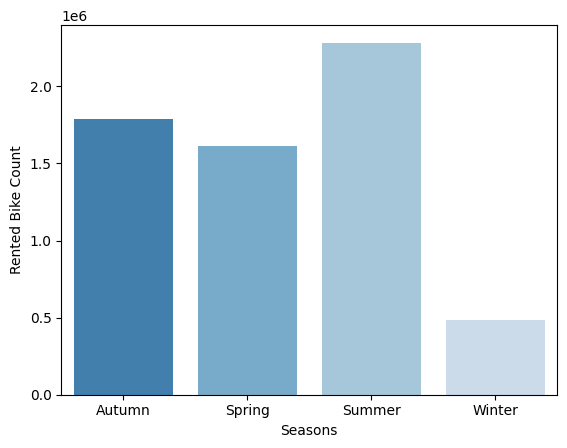

In [140]:
#Visual analysis on 'Season' column
sns.barplot(x=bike_sharing_season_df.index,y=bike_sharing_season_df.columns[0],data=bike_sharing_season_df,palette='tab20c')

Text(0.5, 1.0, 'Percentage of total Bike Rented each year')

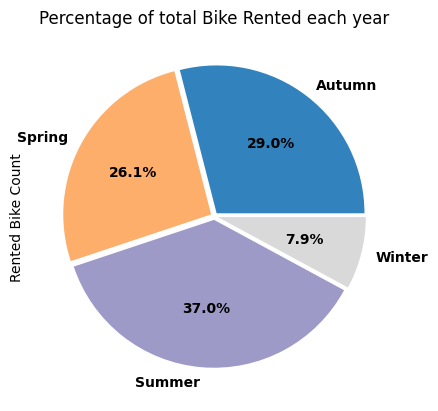

In [141]:
bike_sharing_season_df['Rented Bike Count'].plot.pie(autopct='%2.1f%%',explode=[0.025]*4,textprops={'weight': 'bold'},cmap="tab20c")
plt.title('Percentage of total Bike Rented each year')

### Most of the bikes were rented in summer and lowest number of bikes were rented with winter.

In [142]:
bike_sharing_df_holiday=bike_sharing_df.groupby('Holiday')['Rented Bike Count'].sum().reset_index()
bike_sharing_df_holiday

,Holiday,Rented Bike Count
0,Holiday,215895
1,No Holiday,5956419


Text(0.5, 1.0, 'Holiday bike count')

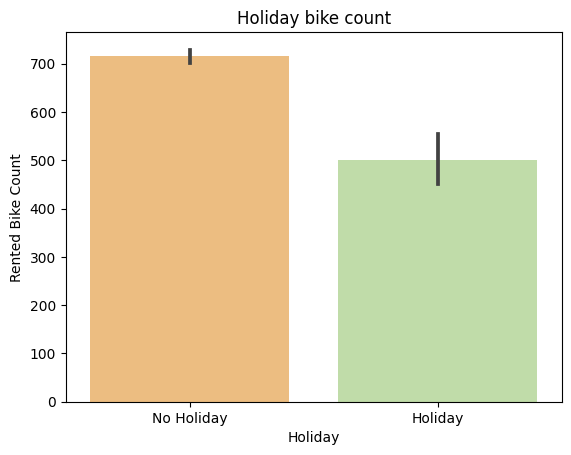

In [143]:
sns.barplot(data=bike_sharing_df,x='Holiday',y='Rented Bike Count',palette='Spectral')
plt.title('Holiday bike count')

### We can see that most of the bikes are rented on Holidays which can mean that most of the people rent the bikes for commuting to work

## Analysis for different Temepratures

In [144]:
bike_sharing_temp_df=bike_sharing_df.groupby('Temperature(°C)')['Rented Bike Count'].sum().reset_index()
bike_sharing_temp_df

,Temperature(°C),Rented Bike Count
0,-17.8,322
1,-17.5,291
2,-17.4,64
3,-16.9,36
4,-16.5,96
...,...,...
541,38.0,1184
542,38.7,475
543,39.0,1033
544,39.3,531


Text(0.5, 1.0, 'Temperature vs Rented Bike Count')

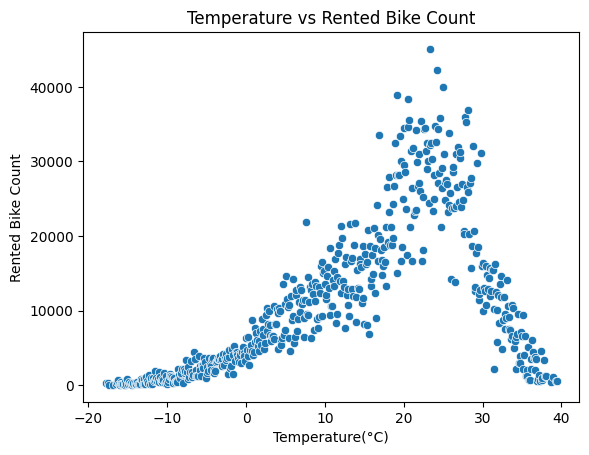

In [145]:
sns.scatterplot(data=bike_sharing_temp_df,x='Temperature(°C)',y='Rented Bike Count')
plt.title('Temperature vs Rented Bike Count')


### We can see that most of the bikes are rented in the temprature range 20 to 30 degrees.

## Anaysis for Rainfall and Snowfall

In [146]:
rented_bike_rainfall=bike_sharing_df.groupby('Rainfall(mm)')['Rented Bike Count'].sum().reset_index()
rented_bike_rainfall.head()

,Rainfall(mm),Rented Bike Count
0,0.0,6086009
1,0.1,15179
2,0.2,3706
3,0.3,1401
4,0.4,2147


Text(0.5, 1.0, 'Number of Bikes rented in Rainfall ')

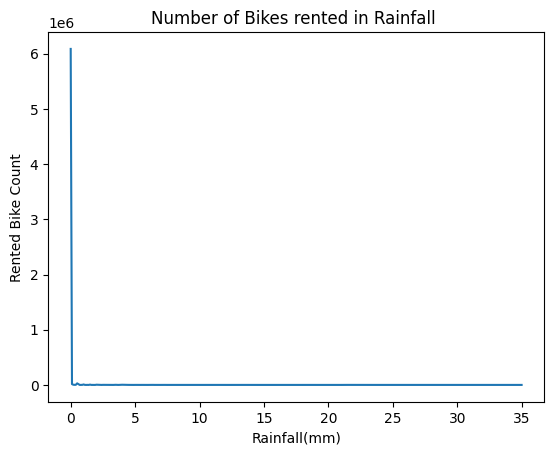

In [147]:
sns.lineplot(data=rented_bike_rainfall,x='Rainfall(mm)',y='Rented Bike Count')
plt.title('Number of Bikes rented in Rainfall ')

In [148]:
rented_bike_snowfall=bike_sharing_df.groupby('Snowfall (cm)')['Rented Bike Count'].sum().reset_index()
rented_bike_snowfall.head()

,Snowfall (cm),Rented Bike Count
0,0.0,6090314
1,0.1,205
2,0.2,3643
3,0.3,8304
4,0.4,5981


Text(0.5, 1.0, 'Number of Bikes rented in Snowfall ')

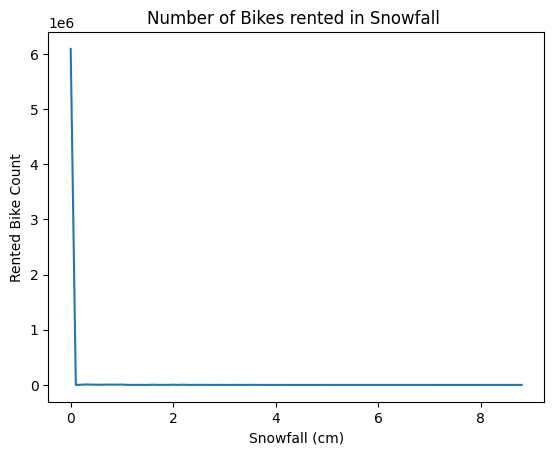

In [149]:
sns.lineplot(data=rented_bike_snowfall,x='Snowfall (cm)',y='Rented Bike Count')
plt.title('Number of Bikes rented in Snowfall ')

### We can see that most bikes are rented when there is no rain or snowfall.

## Analysis for different humidity percentage

In [150]:
bike_rented_humidity=bike_sharing_df.groupby('Humidity(%)')['Rented Bike Count'].sum().reset_index()
bike_rented_humidity.head()

,Humidity(%),Rented Bike Count
0,0,6930
1,10,1315
2,11,1986
3,12,2032
4,13,4353


Text(0.5, 1.0, 'Number of Bikes rented in across differnt Humidity percentage ')

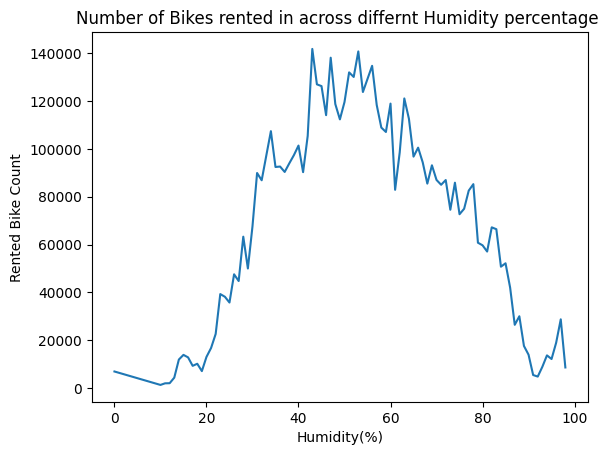

In [151]:
sns.lineplot(data=bike_rented_humidity,x='Humidity(%)',y='Rented Bike Count')
plt.title('Number of Bikes rented in across differnt Humidity percentage ')

## Number of bikes rented at different hours

In [152]:
bike_sharing_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [153]:
bike_sharing_hourly=bike_sharing_df.groupby('Hour')['Rented Bike Count'].sum().reset_index()
bike_sharing_hourly.head()

,Hour,Rented Bike Count
0,0,197633
1,1,155557
2,2,110095
3,3,74216
4,4,48396


<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

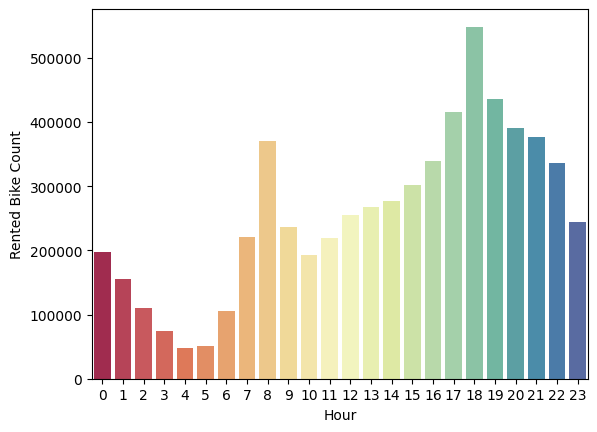

In [154]:
sns.barplot(data=bike_sharing_hourly,x='Hour',y='Rented Bike Count',palette='Spectral')

### We can see that most of the bikes are rented at 18 hour i.e, 6 PM and lowest number of bikes were rented at 4 AM.

## Bike rented at different level of visibility

In [155]:
bike_sharing_visibility=bike_sharing_df.groupby('Visibility (10m)')['Rented Bike Count'].sum().reset_index()
bike_sharing_visibility.head()

,Visibility (10m),Rented Bike Count
0,27,83
1,33,33
2,34,24
3,38,98
4,53,65


<Axes: xlabel='Visibility (10m)', ylabel='Rented Bike Count'>

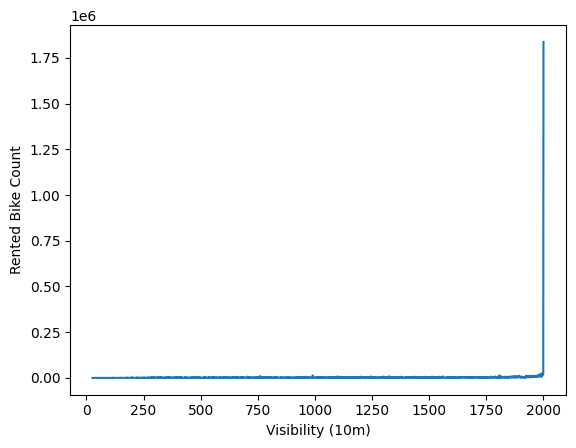

In [156]:
sns.lineplot(data=bike_sharing_visibility,x='Visibility (10m)',y='Rented Bike Count')

### We can see that visibility is preffered by customer because with increasing visibility there is increase in rented bike count.

## Clean up

### Handling null values

Missing data is are values or data which has not been stored in the given dataset.

Missing values can bais the results of the machine learning models or reduce the accuracy of the model.

Therefore it is essential to remove null values from the dataset before training the model.

In [157]:
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

### We can see that there are no null values in the dataset.

## Handling Duplicates

When two features have the same set of values they are duplicated values.
Duplicate values can have depreciating effect on the accuracy, which is why it is essential to remove duplicated values.

In [158]:
bike_sharing_df.duplicated().sum()

0

We can see that there are no duplicated values.

## Removing Outliers

In [159]:
#Creating a list of features that can have outliers.
possible_outliers_column=list(set(bike_sharing_df.describe().columns)-{'Rented Bike Count','Hour'})
possible_outliers_column

['Temperature(°C)',
 'Visibility (10m)',
 'Rainfall(mm)',
 'Wind speed (m/s)',
 'Solar Radiation (MJ/m2)',
 'Snowfall (cm)',
 'Humidity(%)',
 'Dew point temperature(°C)']

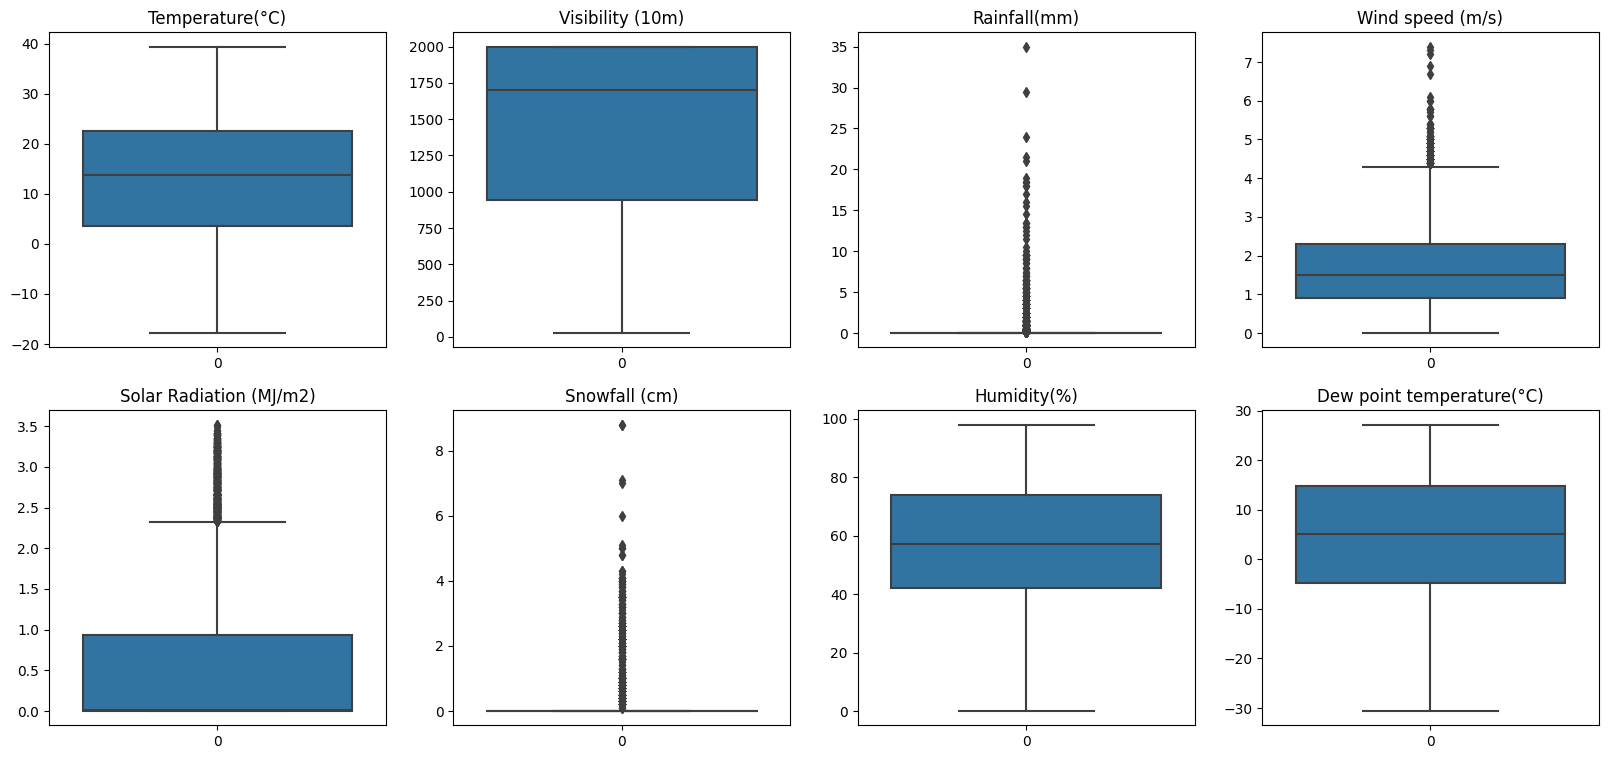

In [160]:
plt.figure(figsize=(20,9))
for index,item in enumerate(possible_outliers_column):
  plt.subplot(2,4,index+1)
  sns.boxplot(bike_sharing_df[item])
  plt.title(item)

## We can see that features that have outliers are Solar Radiation,Rainfall,Snowfall and Windspeed.

In [161]:
#Creating a list of outliers columns.
outliers_columns=['Solar Radiation (MJ/m2)','Wind speed (m/s)','Rainfall(mm)','Snowfall (cm)']
outliers_columns

['Solar Radiation (MJ/m2)',
 'Wind speed (m/s)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [162]:
#Findng the inter-quartile range for the columns with outliers.
Q1=bike_sharing_df[outliers_columns].quantile(0.25)
Q3=bike_sharing_df[outliers_columns].quantile(0.75)
#Inter quartile range
IQR=Q3-Q1
IQR

Solar Radiation (MJ/m2)    0.93
Wind speed (m/s)           1.40
Rainfall(mm)               0.00
Snowfall (cm)              0.00
dtype: float64

In [163]:
#Calculating the upper and lower limit for outlier removal
upper_limit=Q3+(1.5*IQR)
lower_limit=Q1-(1.5*IQR)


In [164]:
#Detecting and removing the outliers
bike_sharing_df[outliers_columns]=bike_sharing_df[outliers_columns][~((bike_sharing_df[outliers_columns]<lower_limit) | (bike_sharing_df[outliers_columns]>upper_limit))]

In [165]:
#Checking the number of outliers detected
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8599 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8119 non-null   float64
 9   Rainfall(mm)               8232 non-null   float64
 10  Snowfall (cm)              8317 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Because of outliers detection some null values are created, we have to populate those with some meaningul values.
#### Populating the null values with mean.

In [166]:
for value in outliers_columns:
    bike_sharing_df[value].fillna(np.mean(bike_sharing_df[value]),inplace=True)
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### We have removed outliers

## Feature Enginnering

### Feature Encoding

Machine learning model only works with numerical values and hence important categorical values are converted into numerical variables.

In [167]:
#Encoding for season column
bike_sharing_df['Winter']=bike_sharing_df['Seasons'].apply(lambda x: 1 if x=='Winter' else 0)
bike_sharing_df['Spring']=bike_sharing_df['Seasons'].apply(lambda x: 1 if x=='Spring' else 0)
bike_sharing_df['Summer']=bike_sharing_df['Seasons'].apply(lambda x: 1 if x=='Summer' else 0)
bike_sharing_df['Autumn']=bike_sharing_df['Seasons'].apply(lambda x: 1 if x=='Autumn' else 0)

#Removing seasons column since it is not required anymore
bike_sharing_df.drop(columns=['Seasons'],axis=1,inplace=True)

In [168]:
#Encoding for Holiday column
bike_sharing_df['Holiday']=bike_sharing_df['Holiday'].apply(lambda x: 1 if x=='Holiday' else 0)

In [169]:
#Encoding for Functioning Day column
bike_sharing_df['Functioning Day']=bike_sharing_df['Functioning Day'].apply(lambda x: 1 if x=='Yes' else 0)

In [170]:
#Checking the dataset after encoding
bike_sharing_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Winter,Spring,Summer,Autumn
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,1,0,0,0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,1,0,0,0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,1,0,0,0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,1,0,0,0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,1,0,0,0


#### We have completed the Feature Encoding

## Checking for correlation for feature removal

If some of the features are correlated with each other we can choose only one of them for model implementation since it will be having the same effect.

<ipython-input-171-2da708f65a58>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=bike_sharing_df.corr()


<Axes: >

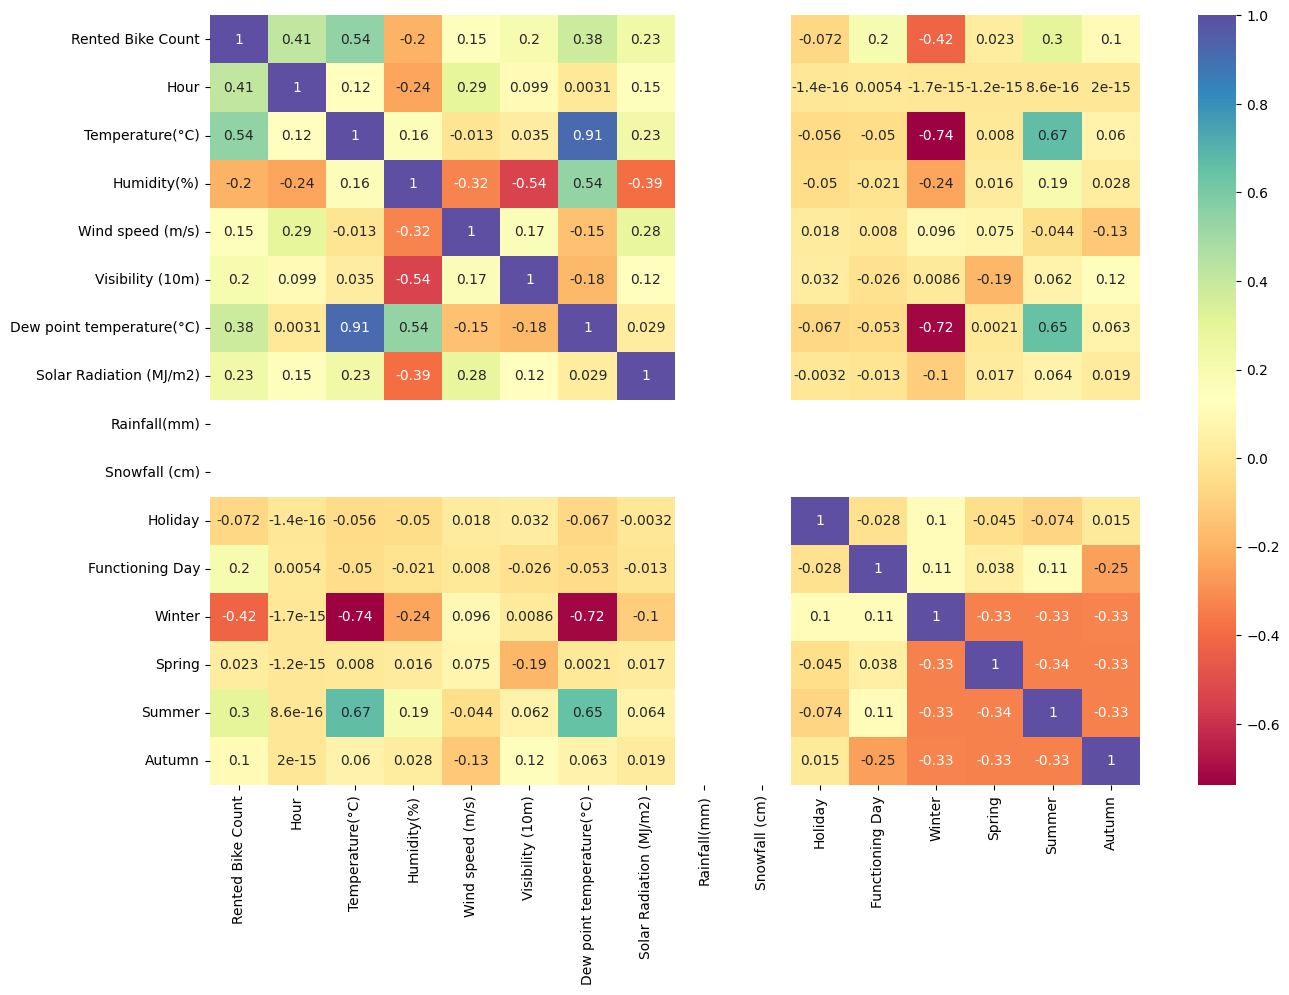

In [171]:
corr_matrix=bike_sharing_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,annot=True,cmap='Spectral')

### We can see that dew point temperature is highly Temperature therefore we can remove it, without much effect on the model, also removing the date column since it most likely won't be having any effect on the model

In [172]:
bike_sharing_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Winter,Spring,Summer,Autumn
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,1,0,0,0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,1,0,0,0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,1,0,0,0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,1,0,0,0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,1,0,0,0


In [173]:
#Droping the Dew point temperature and Date columns
bike_sharing_df.drop(columns={'Dew point temperature(°C)','Date'},axis=1,inplace=True)
bike_sharing_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Winter,Spring,Summer,Autumn
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,1,1,0,0,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,1,1,0,0,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,1,0,0,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,1,1,0,0,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,1,1,0,0,0


## Removing Multicollinearity

Multicollinearity is when two independent variables are highly correlated with each other.
Multicollinearity affects the regression model therefore we will be removing multicollinearity using VIF, Accepted VIF value is 20.

In [174]:
#Creating the independent variable list
independent_features=list(set(bike_sharing_df.columns)-{'Rented Bike Count'})
independent_features

['Temperature(°C)',
 'Visibility (10m)',
 'Rainfall(mm)',
 'Wind speed (m/s)',
 'Solar Radiation (MJ/m2)',
 'Hour',
 'Autumn',
 'Spring',
 'Snowfall (cm)',
 'Functioning Day',
 'Humidity(%)',
 'Winter',
 'Summer',
 'Holiday']

In [175]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["Columns"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [176]:
#Calculating the VIF for independent columns
calc_vif(bike_sharing_df[independent_features])

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Columns,VIF
0,Temperature(°C),4.540860
1,Visibility (10m),1.643029
2,Rainfall(mm),NaN
3,Wind speed (m/s),1.250312
4,Solar Radiation (MJ/m2),1.411971
5,Hour,1.183842
6,Autumn,23.999694
7,Spring,23.809746
8,Snowfall (cm),NaN
9,Functioning Day,1.079392


We can see that season encoding have very high VIF values therefore we can eliminate one of them, choosing 'Winter' because it has the lowest bike_rented count.We will also remove Snowfall and Rainfall because it value is Nan.

In [177]:
#Dropping the columns for multicollinearity
bike_sharing_df.drop(columns=['Rainfall(mm)','Snowfall (cm)','Winter'],axis=1,inplace=True)

In [178]:
#Creating the independent variable with remaining features
independent_features=list(set(bike_sharing_df.columns)-{'Rented Bike Count'})

In [179]:
#Checking for VIF
calc_vif(bike_sharing_df[independent_features])

,Columns,VIF
0,Temperature(°C),9.804377
1,Visibility (10m),7.353680
2,Wind speed (m/s),4.948045
3,Solar Radiation (MJ/m2),1.897630
4,Hour,4.230808
5,Autumn,4.448386
6,Spring,3.976162
7,Functioning Day,19.091560
8,Humidity(%),10.829677
9,Summer,9.214782


### Multicollinearity has been removed from the features.

# Correlation plot between independent and dependent variablies.

We will use regression plot to find this correlation

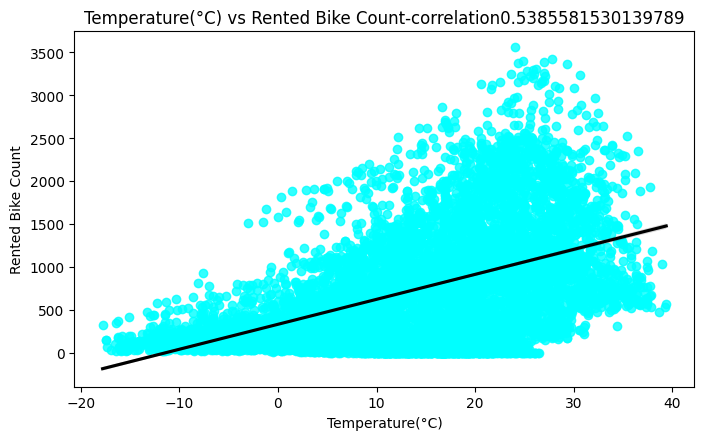

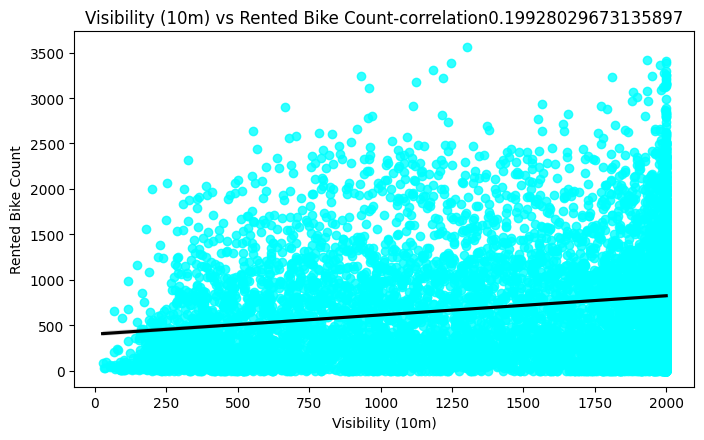

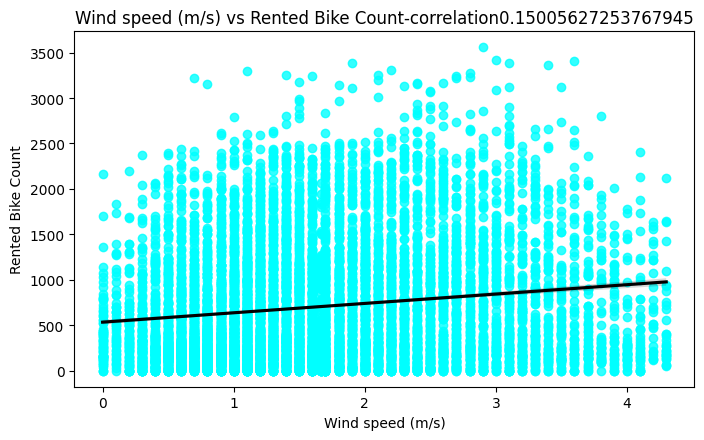

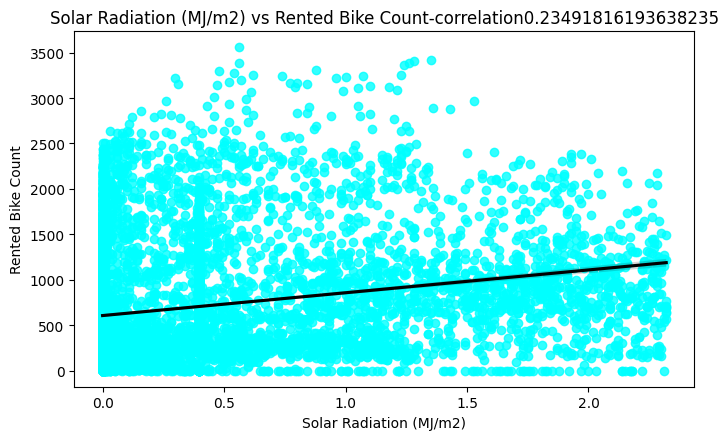

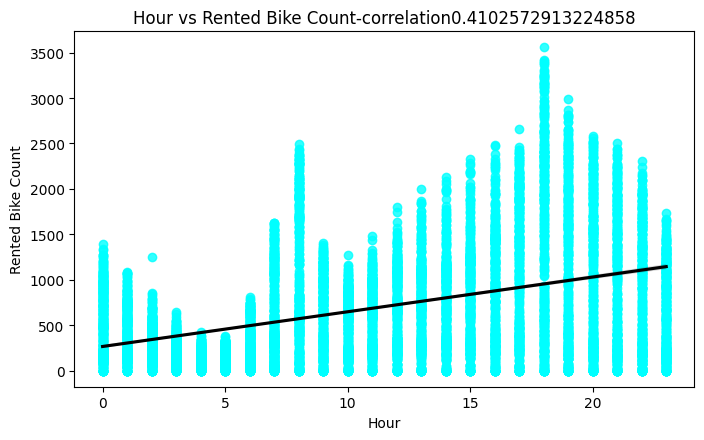

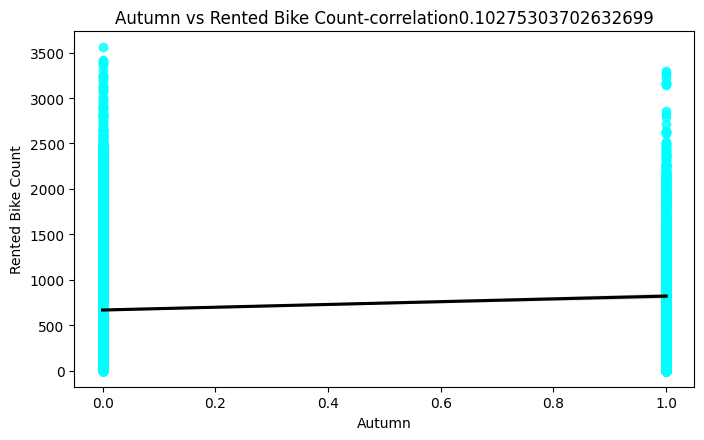

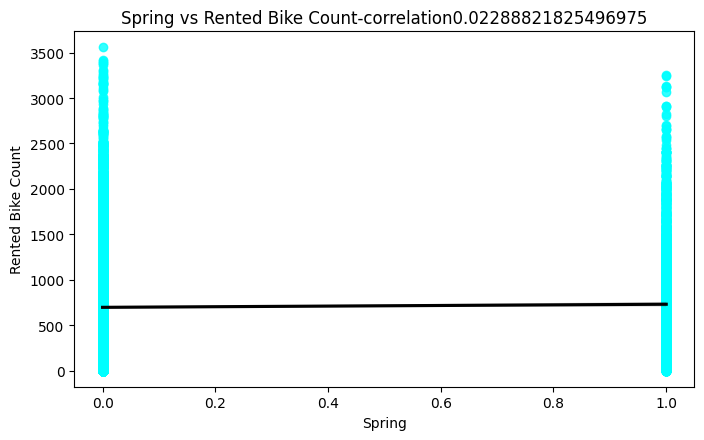

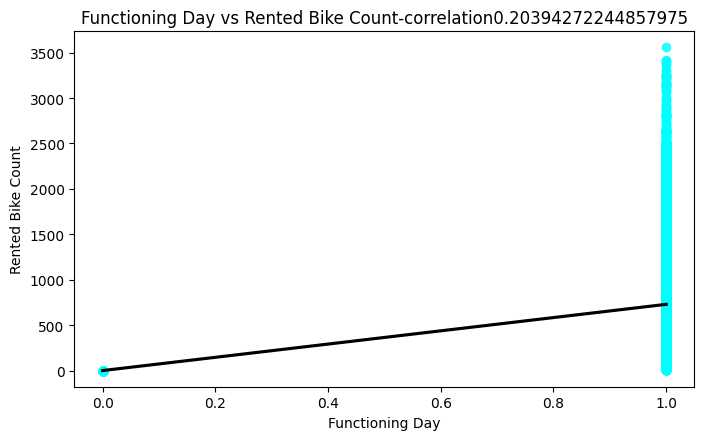

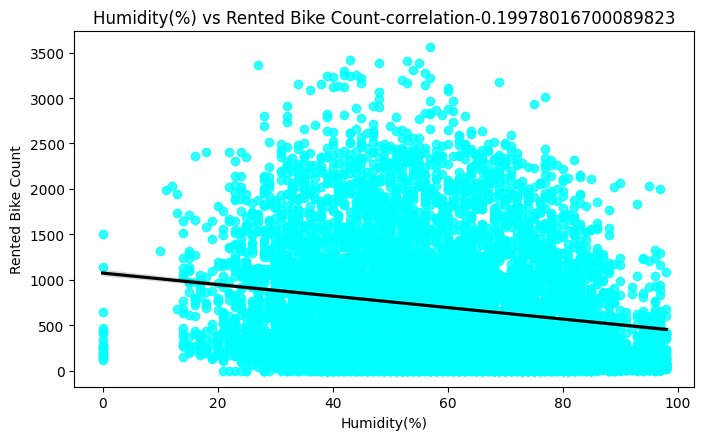

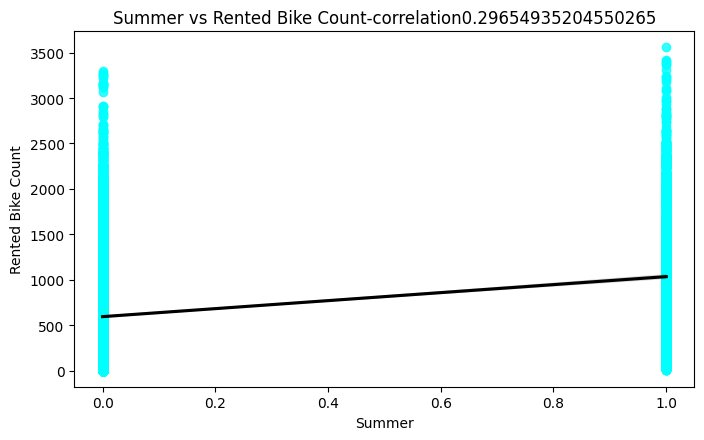

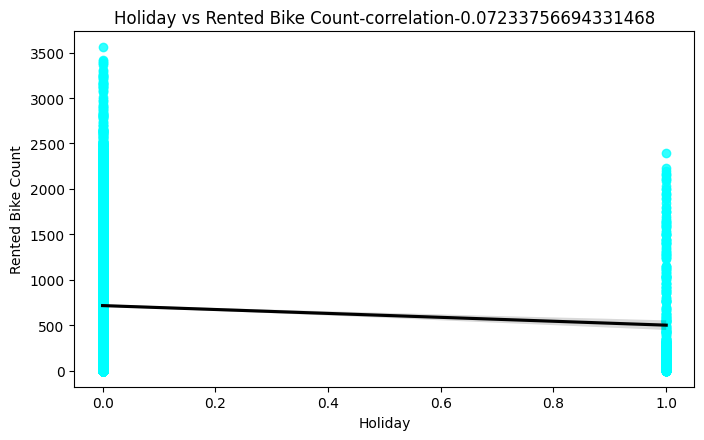

In [180]:
for index,independent_feature in enumerate(independent_features):
  plt.figure(figsize=(8,60))
  plt.subplot(11,1,index+1)
  sns.regplot(x=bike_sharing_df[independent_feature],y=bike_sharing_df['Rented Bike Count'],scatter_kws={"color": 'cyan'}, line_kws={"color": "black"})
  corre=bike_sharing_df[independent_feature].corr(bike_sharing_df['Rented Bike Count'])
  plt.title(str(independent_feature)+' vs Rented Bike Count-correlation'+str(corre))

We can see that all independent variables have linear relationship with Rented Bike Count, therefore we can proceed.

## Pre Processing of Data

In [181]:
#Creating the dataset for independent and dependent variables
x=bike_sharing_df.drop('Rented Bike Count',axis=1)
y=bike_sharing_df['Rented Bike Count']

In [182]:
#looking at the independent variables
x.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Holiday,Functioning Day,Spring,Summer,Autumn
0,0,-5.2,37,2.2,2000,0.0,0,1,0,0,0
1,1,-5.5,38,0.8,2000,0.0,0,1,0,0,0
2,2,-6.0,39,1.0,2000,0.0,0,1,0,0,0
3,3,-6.2,40,0.9,2000,0.0,0,1,0,0,0
4,4,-6.0,36,2.3,2000,0.0,0,1,0,0,0


In [183]:
#looking at the dependent variable
y.head()

0    254
1    204
2    173
3    107
4     78
Name: Rented Bike Count, dtype: int64

## Target feature conditioning

### To analyse the distribution of target feature to know the skweness of the distribution.

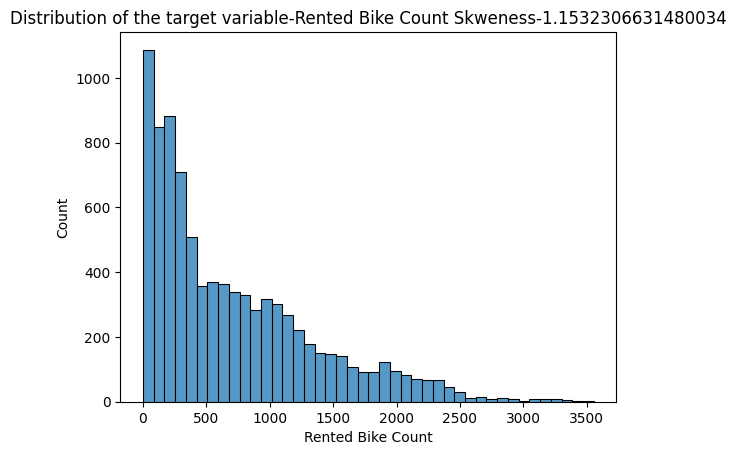

In [184]:
sns.histplot(data=bike_sharing_df,x='Rented Bike Count')
plt.title('Distribution of the target variable-Rented Bike Count Skweness-'+str(skew(bike_sharing_df['Rented Bike Count'])))
plt.show()

### We can see that  target variable is positively skewed therefore using square root transformation for the target variable.

In [185]:
#Applying square root transformation on the dataset variable
y=np.sqrt(y)

In [186]:
#Checking the distribution after applying the transformation
dependent_variable_df=y.reset_index()
dependent_variable_df

,index,Rented Bike Count
0,0,15.937377
1,1,14.282857
2,2,13.152946
3,3,10.344080
4,4,8.831761
...,...,...
8755,8755,31.670175
8756,8756,27.640550
8757,8757,26.343880
8758,8758,26.683328


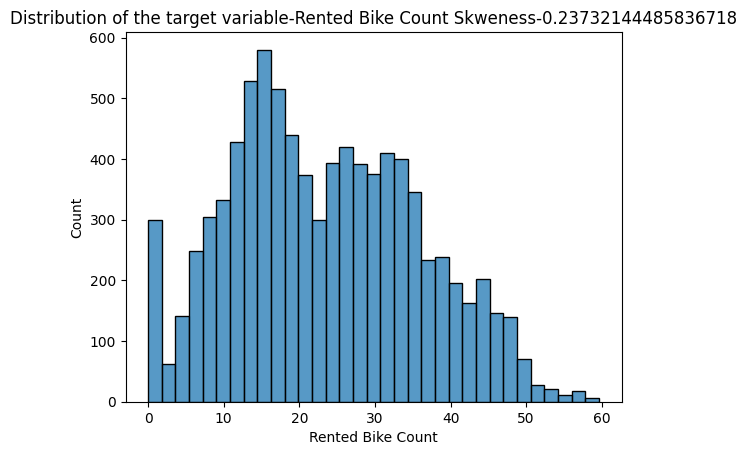

In [187]:
sns.histplot(data=dependent_variable_df,x='Rented Bike Count')
plt.title('Distribution of the target variable-Rented Bike Count Skweness-'+str(skew(dependent_variable_df['Rented Bike Count'])))
plt.show()

### We can see that the target variable is normalized

## Creating the test and train dataset

In [188]:
#Splitting train and test dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [189]:
#Shape of the training dataset
x_train.shape

(6570, 11)

In [190]:
#Shape of the testing dataset
x_test.shape

(2190, 11)

## Feature Scaling

#### Feature engineering is a technique to standardize the independent feature preset in the dataset.It is performed in feature engineering during pre-processing to handle highly varying magnitude or values or units.If feature scaling is not done higher values are given more importance and lower value are given lower value regardless of units.


#### Ways to feature scale:

#### *  Min max normalization
#### *  Standardisation

#### Using StandartScaler() function for this project.



In [191]:
#Creating object for the StandardScaler function
scaler = StandardScaler()

In [192]:
#Standardizing the dataset
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [193]:
#Overview of standardize dataset
x_train

array([[ 1.66765533, -0.74954694,  1.22697808, ..., -0.5807482 ,
        -0.57582707,  1.72819284],
       [ 0.36544652,  0.93615918, -0.54181953, ...,  1.72191666,
        -0.57582707, -0.57863913],
       [ 1.08889586, -1.65916064, -1.22968527, ..., -0.5807482 ,
        -0.57582707, -0.57863913],
       ...,
       [-0.06862308,  1.06133538, -0.05048686, ..., -0.5807482 ,
         1.73663249, -0.57863913],
       [-1.66021162, -0.37401835,  0.04777967, ...,  1.72191666,
        -0.57582707, -0.57863913],
       [ 1.23358573, -0.47415931,  1.22697808, ...,  1.72191666,
        -0.57582707, -0.57863913]])

## Model Implementation

#### In this project since we are dealing with a regression problem therefore we will be using Linear Regression models.
#### We will be implementing these following models-


#### 1.   Linear Regression
#### 2.   Ridge Regression(Linear Regression with L2 regression)
#### 3.   Lasso Regression(Linear Regression with L1 regression)
#### 4.   Random Forest Regression





## Linear Regression

In [194]:
#linear regression object
linear_regression=LinearRegression()

In [195]:
#Training linear regression model
#Our model is trained using the train dataset(x_train-independent variables, y_train-dependent variables)
linear_regression.fit(x_train,y_train)

LinearRegression()

In [196]:
#Checking the how well linear regression model fits the training dataset
linear_regression.score(x_train,y_train)

0.6296654396693746

In [197]:
#Checking linear regression coffecient
linear_regression.coef_

array([ 3.33525105,  5.2673002 , -3.13170872,  0.03623831,  0.36149728,
        0.07041366, -0.63042276,  4.93799457,  2.23099148,  2.26763181,
        3.51497169])

In [198]:
#Predicting for test dataset
y_pred_lr=linear_regression.predict(x_test)
y_pred_lr 

array([18.03228208, 24.5751741 , 17.3223801 , ..., 38.24924844,
        2.2271048 , 35.82219195])

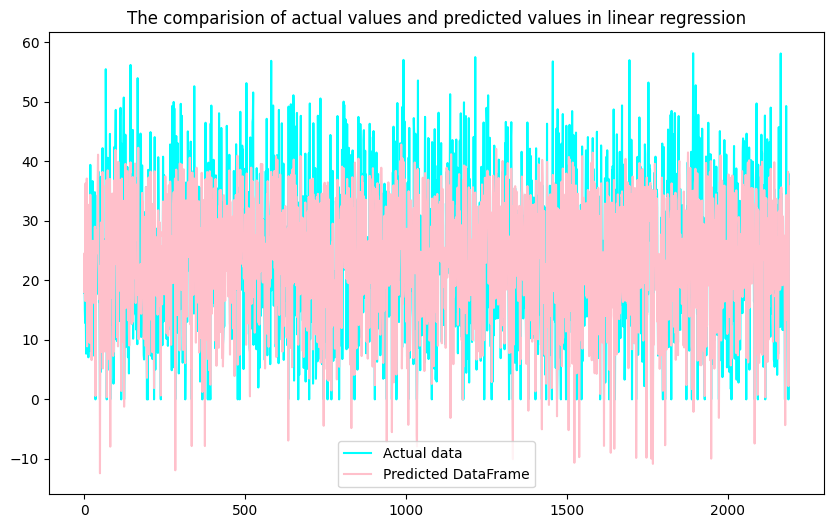

In [199]:
#Visual comparison for actual and predicted values
plt.figure(figsize=(10,6))
plt.plot(np.array(y_test),color='cyan',label='Actual data')
plt.plot(y_pred_lr,color='pink',label='Predicted DataFrame')
plt.legend()
plt.title('The comparision of actual values and predicted values in linear regression')
plt.show()

In [224]:
#Creating a function for evaluation of the model, for getting MSE,RMSE,R2 and Adjusted R2 scores.
def eval_metric(ypred,model):
  mse=mean_squared_error(y_test,ypred) # Mean squared error
  print('Mean squred error for ' +model+' is: ',mse)
  rmse=np.sqrt(mse) #Root mean squared error
  print('Root mean squared error for '+model+' is: ',rmse)
  r2=r2_score(y_test,ypred)#r2 score
  print('R squared value for '+model+' is: ',r2)
  adjusted_r2=1-(1-r2_score(y_test,ypred))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
  print('Adjusted R squared value for '+model+' is: ',adjusted_r2)




In [201]:
#Calculating the evaluation metrics for Linear Regression
eval_metric(y_pred_lr,'Linear Regression')

Mean squred error forLinear Regressionis:  57.30272317000448
Root mean squared error forLinear Regressionis:  7.569856218581993
R squared value for Linear Regressionis:  0.637247402254012
Adjusted R squared value for Linear Regressionis:  0.6354153184270122


## Ridge Regression
### Ridge regression is a method of estimating the coefficients where independent variables are highly correlated. It uses L2 regularization method.

In [204]:
#Training the ridge regression model using gridsearchcv
ridge=Ridge()
parameter={'alpha':[1,0.01,10,20,25,30,35,40,50,60,100,200,500,1000]}
ridge_model_grid=GridSearchCV(ridge,param_grid=parameter,scoring='neg_mean_squared_error',cv=3)
ridge_model_grid.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1, 0.01, 10, 20, 25, 30, 35, 40, 50, 60, 100,
                                   200, 500, 1000]},
             scoring='neg_mean_squared_error')

In [206]:
#getting the best parameter α for the ridge linear regression model.
print('The best parameter(α) for the the ridge model is-',ridge_model_grid.best_params_)
print('Using'+str(ridge_model_grid.best_params_)+'as is provides the best neg_mean_squared_error',ridge_model_grid.best_score_)

The best parameter(α) for the the ridge model is- {'alpha': 20}
Using{'alpha': 20}as is provides the best neg_mean_squared_error -57.26484717043635


In [208]:
#Fitting the ridge regression model with best parameter alpha:20
ridge_model=Ridge(alpha=20)
ridge_model.fit(x_train,y_train)

Ridge(alpha=20)

In [ ]:
#Training the Lasso regression model using gridsearchcv
lasso=Lasso()
parameter={'alpha':[1,0.01,10,20,25,30,35,40,50,60,100,200,500,1000]}
lasso_model_grid=GridSearchCV(ridge,param_grid=parameter,scoring='neg_mean_squared_error',cv=3)
lasso_model_grid.fit(x_train,y_train)

In [209]:
y_pred_ridge=ridge_model.predict(x_test)
y_pred_ridge

array([18.05595175, 24.58917763, 17.37510016, ..., 38.18144141,
        2.3394689 , 35.78601757])

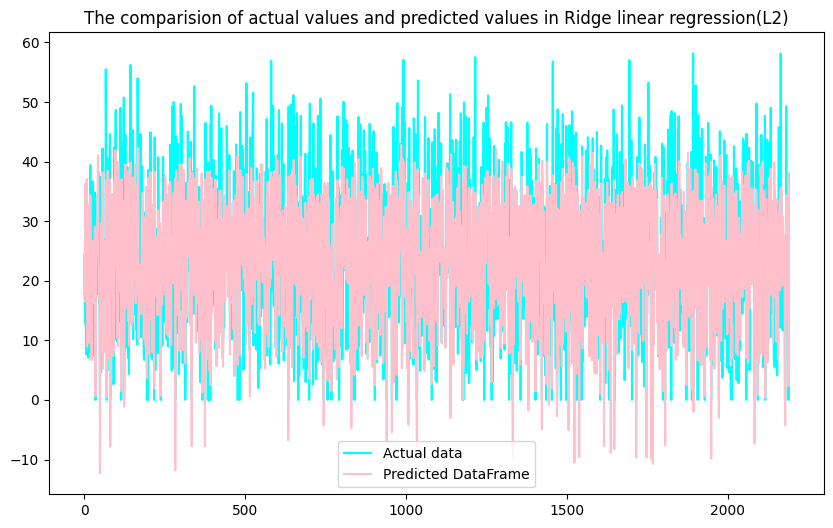

In [212]:
#Visual comparison for actual and predicted values
plt.figure(figsize=(10,6))
plt.plot(np.array(y_test),color='cyan',label='Actual data')
plt.plot(y_pred_ridge,color='pink',label='Predicted DataFrame')
plt.legend()
plt.title('The comparision of actual values and predicted values in Ridge linear regression(L2)')
plt.show()

In [211]:
#Checking evaluation parameters for the ridge model.
eval_metric(y_pred_ridge,'Ridge Regression')

Mean squred error forRidge Regressionis:  57.309935762840304
Root mean squared error forRidge Regressionis:  7.57033260582653
R squared value for Ridge Regressionis:  0.6372017432234645
Adjusted R squared value for Ridge Regressionis:  0.6353694287953002


### We can see that there is little or no improvement in the model over normal linear regression therefore using Lasso Regression for checking if we can get a better performing regression model.

## Lasso Regression
### Lasso regression analysis is a shrinkage and variable selection method for linear regression models.It uses the Linear regression model with L1 regularization.

In [214]:
#Training the lasso regression model using gridsearchcv
lasso=Lasso()
parameter={'alpha':[1,0.01,10,20,25,30,35,40,50,60,100,200,500,1000]}
lasso_model_grid=GridSearchCV(lasso,param_grid=parameter,scoring='neg_mean_squared_error',cv=3)
lasso_model_grid.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1, 0.01, 10, 20, 25, 30, 35, 40, 50, 60, 100,
                                   200, 500, 1000]},
             scoring='neg_mean_squared_error')

In [218]:
#getting the best parameter α for the lasso linear regression model.
print('The best parameter(α) for the the lasso model is-',lasso_model_grid.best_params_)
print('Using'+str(lasso_model_grid.best_params_)+'as is provides the best neg_mean_squared_error',lasso_model_grid.best_score_)

The best parameter(α) for the the lasso model is- {'alpha': 0.01}
Using{'alpha': 0.01}as is provides the best neg_mean_squared_error -57.26394071782303


In [219]:
#Fitting the ridge regression model with best parameter alpha:20
lasso_model=Lasso(alpha=0.01)
lasso_model.fit(x_train,y_train)

Lasso(alpha=0.01)

In [220]:
y_pred_lasso=lasso_model.predict(x_test)
y_pred_lasso

array([18.03466789, 24.62880052, 17.39144279, ..., 38.23049598,
        2.22154384, 35.79261742])

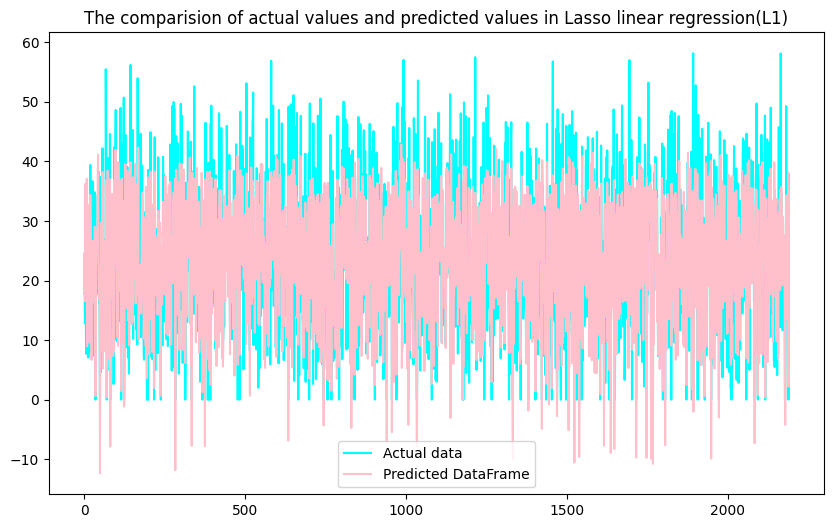

In [221]:
#Visual comparison for actual and predicted values
plt.figure(figsize=(10,6))
plt.plot(np.array(y_test),color='cyan',label='Actual data')
plt.plot(y_pred_lasso,color='pink',label='Predicted DataFrame')
plt.legend()
plt.title('The comparision of actual values and predicted values in Lasso linear regression(L1)')
plt.show()

In [226]:
#Checking evaluation parameters for the lasso model.
eval_metric(y_pred_lasso,'Lasso Regression')

Mean squred error for Lasso Regression is:  57.31355444126143
Root mean squared error for Lasso Regression is:  7.570571605979395
R squared value for Lasso Regression is:  0.6371788353244143
Adjusted R squared value for Lasso Regression is:  0.6353464051997901


### We can see that just like Ridge regression there is little or no improvement in the model over normal linear regression therefore using Random Forest Regression for checking if we can get a better performing regression model.
